<a href="https://colab.research.google.com/github/Davixino/Trabajo-Final/blob/main/An%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFM - Análisis de datos





**NOMBRE**: Ronald Jiménez

##PREPROCESAMIENTO Y CALIDAD DE DATOS

## **LIBRERIAS**

Aplicar las librerias necesarias para el proceso de preprocesado y calidad de datos. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
%matplotlib inline
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### ETAPA 1: INTEGRACION Y RECOPILACION DE DATOS 


Importar ficheros en formato xlsx

LEER DATOS INICIALES

In [2]:
df = pd.read_excel("Dataset.xlsx") 

LEER DATOS DE COORDENADAS DE ESPAÑA

In [3]:
df2 = pd.read_excel("coordenadas.xlsx") 

Fusionar dos datasets (DATOS INICIALES DGT Y DATOS DE COORDENADAS DE ESPAÑA)

In [4]:
df_merge = pd.merge(df, df2, left_on='COD_PROVINCIA', right_on='Codigo')

Eliminar la instancia Geo Shape que no aporta información

In [5]:
cols_to_drop = ['Geo Shape']
df_merge = df_merge.drop(cols_to_drop, axis=1)

LEER DATOS POSTALES DE ESPAÑA

In [6]:
df_cod = pd.read_excel("codigos postales.xlsx") 

Fusionar TRES datasets (DATOS INICIALES DGT, DATOS DE COORDENADAS Y DATOS POSTALES DE ESPAÑA)

In [7]:
df_cod = pd.merge(df_merge, df_cod, left_on='COD_MUNICIPIO', right_on='Código Municipio')

### ETAPA 2: PREPROCESAMIENTO: LIMPIEZA DE DATOS

Ejecutar el conjunto de datos recopilados 

In [8]:
from google.colab.data_table import DataTable
DataTable.max_columns = 100
df_cod

,SECUENCIAL,ID_ACCIDENTE,ANYO,MES,DIA_SEMANA,HORA,COD_PROVINCIA,COD_MUNICIPIO,ISLA,ZONA,...,ACERA,TRAZADO_PLANTA,Geo Point,CCAA,Cod_CCAA,Provincia,Texto,Codigo,Código Municipio,Municipio
0,3,202001002900213,2020,1,5,20,1,1002,NaN,1,...,998,2,"42.8351264353,-2.72060346921",País Vasco,16,Araba,Álava,1,1002,AMURRIO
1,4,202001002900757,2020,2,6,21,1,1002,NaN,1,...,998,3,"42.8351264353,-2.72060346921",País Vasco,16,Araba,Álava,1,1002,AMURRIO
2,5,202001002900789,2020,2,7,0,1,1002,NaN,1,...,998,1,"42.8351264353,-2.72060346921",País Vasco,16,Araba,Álava,1,1002,AMURRIO
3,6,202001002900841,2020,2,2,17,1,1002,NaN,1,...,998,2,"42.8351264353,-2.72060346921",País Vasco,16,Araba,Álava,1,1002,AMURRIO
4,7,202001002900957,2020,2,7,10,1,1002,NaN,1,...,998,2,"42.8351264353,-2.72060346921",País Vasco,16,Araba,Álava,1,1002,AMURRIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63379,72955,202152001000006,2020,12,1,15,52,52001,NaN,3,...,998,998,"35.2908279949,-2.95053552337",Melilla,19,Melilla,Melilla,52,52001,MELILLA
63380,72956,202152001000007,2020,12,4,9,52,52001,NaN,3,...,4,998,"35.2908279949,-2.95053552337",Melilla,19,Melilla,Melilla,52,52001,MELILLA
63381,72957,202152001000008,2020,12,5,17,52,52001,NaN,3,...,4,998,"35.2908279949,-2.95053552337",Melilla,19,Melilla,Melilla,52,52001,MELILLA
63382,72958,202152001000009,2020,12,4,21,52,52001,NaN,3,...,4,998,"35.2908279949,-2.95053552337",Melilla,19,Melilla,Melilla,52,52001,MELILLA


Determinar la cantidad de registros y la instancia

In [9]:
df_cod.shape

(63384, 83)

Analizar  el tipo de datos de cada variable

In [10]:
df_cod.dtypes

SECUENCIAL           int64
ID_ACCIDENTE         int64
ANYO                 int64
MES                  int64
DIA_SEMANA           int64
                     ...  
Provincia           object
Texto               object
Codigo               int64
Código Municipio     int64
Municipio           object
Length: 83, dtype: object

 Averiguar cuales son las variables cuantativas 

In [11]:
df_numeric = df_cod.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['SECUENCIAL' 'ID_ACCIDENTE' 'ANYO' 'MES' 'DIA_SEMANA' 'HORA'
 'COD_PROVINCIA' 'COD_MUNICIPIO' 'ISLA' 'ZONA' 'ZONA_AGRUPADA' 'KM'
 'SENTIDO_1F' 'TITULARIDAD_VIA' 'TIPO_VIA' 'TIPO_ACCIDENTE' 'TOTAL_HG24H'
 'TOTAL_HL24H' 'TOTAL_VICTIMAS_24H' 'TOTAL_MU30DF' 'TOTAL_HG30DF'
 'TOTAL_HL30DF' 'TOTAL_VICTIMAS_30DF' 'TOTAL_VEHICULOS' 'TOT_PEAT_MU24H'
 'TOT_BICI_MU24H' 'TOT_CICLO_MU24H' 'TOT_MOTO_MU24H' 'TOT_TUR_MU24H'
 'TOT_FURG_MU24H' 'TOT_CAM_MENOS3500_MU24H' 'TOT_CAM_MAS3500_MU24H'
 'TOT_BUS_MU24H' 'TOT_VMP_MU24H' 'TOT_OTRO_MU24H' 'TOT_SINESPECIF_MU24H'
 'TOT_PEAT_MU30DF' 'TOT_BICI_MU30DF' 'TOT_CICLO_MU30DF' 'TOT_MOTO_MU30DF'
 'TOT_TUR_MU30DF' 'TOT_FURG_MU30DF' 'TOT_CAM_MENOS3500_MU30DF'
 'TOT_CAM_MAS3500_MU30DF' 'TOT_BUS_MU30DF' 'TOT_VMP_MU30DF'
 'TOT_OTRO_MU30DF' 'TOT_SINESPECIF_MU30DF' 'NUDO' 'NUDO_INFO'
 'PRIORI_NORMA' 'PRIORI_AGENTE' 'PRIORI_SEMAFORO' 'PRIORI_VERT_STOP'
 'PRIORI_VERT_CEDA' 'PRIORI_HORIZ_STOP' 'PRIORI_HORIZ_CEDA'
 'PRIORI_MARCAS' 'PRIORI_PEA_NO_ELEV' 'PRIORI_PEA_ELEV'
 'P

Averiguar cuales son las variables categóricas o cualitativas

In [12]:
df_non_numeric = df_cod.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['CARRETERA' 'TOTAL_MU24H' 'CARRETERA_CRUCE' 'Geo Point' 'CCAA'
 'Provincia' 'Texto' 'Municipio']


Se procede instalar la libreria missingno para detectar los valores anulos de todas las variables numéricas

In [ ]:
#!pip install missingno

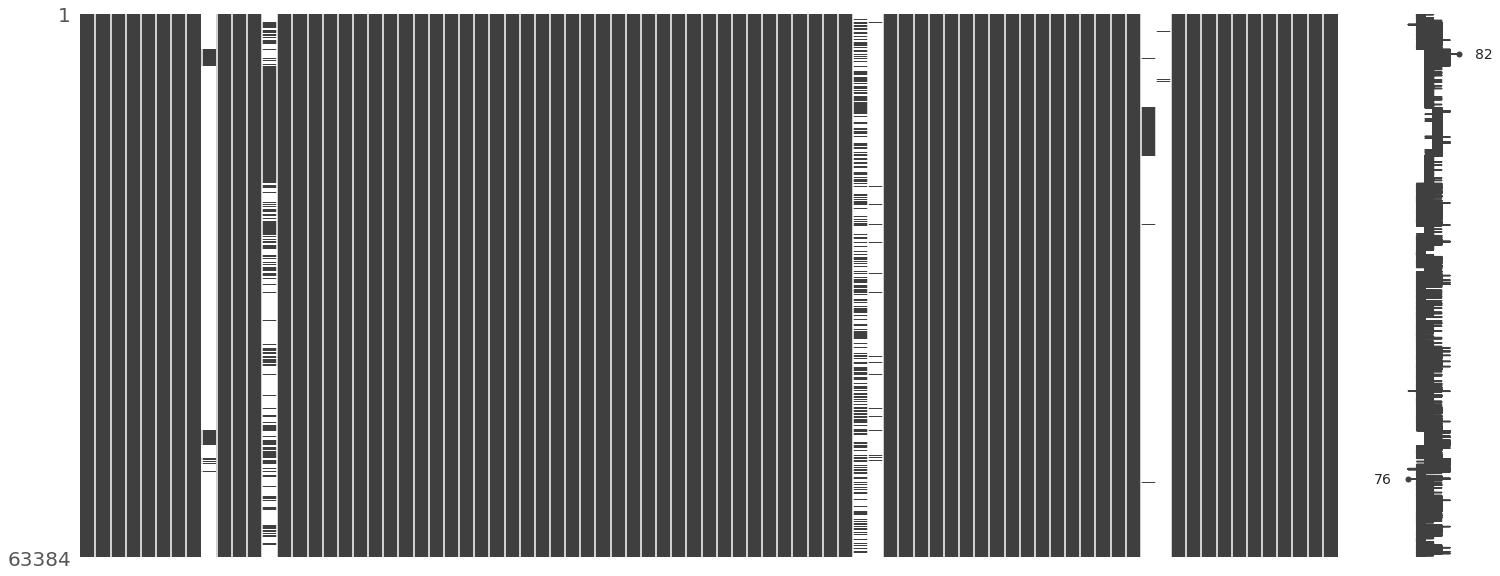

In [13]:
import missingno as msno
msno.matrix(df_cod)

Se procede analizar los valores faltantes de cada variable

In [14]:
for col in df_cod.columns:
    pct_missing = np.mean(df_cod[col].isna().sum())
    print('{} - {}'.format(col, round(pct_missing)))

SECUENCIAL - 0
ID_ACCIDENTE - 0
ANYO - 0
MES - 0
DIA_SEMANA - 0
HORA - 0
COD_PROVINCIA - 0
COD_MUNICIPIO - 0
ISLA - 58955
ZONA - 0
ZONA_AGRUPADA - 0
CARRETERA - 0
KM - 33040
SENTIDO_1F - 0
TITULARIDAD_VIA - 0
TIPO_VIA - 0
TIPO_ACCIDENTE - 0
TOTAL_MU24H - 0
TOTAL_HG24H - 0
TOTAL_HL24H - 0
TOTAL_VICTIMAS_24H - 0
TOTAL_MU30DF - 0
TOTAL_HG30DF - 0
TOTAL_HL30DF - 0
TOTAL_VICTIMAS_30DF - 0
TOTAL_VEHICULOS - 0
TOT_PEAT_MU24H - 0
TOT_BICI_MU24H - 0
TOT_CICLO_MU24H - 0
TOT_MOTO_MU24H - 0
TOT_TUR_MU24H - 0
TOT_FURG_MU24H - 0
TOT_CAM_MENOS3500_MU24H - 0
TOT_CAM_MAS3500_MU24H - 0
TOT_BUS_MU24H - 0
TOT_VMP_MU24H - 0
TOT_OTRO_MU24H - 0
TOT_SINESPECIF_MU24H - 0
TOT_PEAT_MU30DF - 0
TOT_BICI_MU30DF - 0
TOT_CICLO_MU30DF - 0
TOT_MOTO_MU30DF - 0
TOT_TUR_MU30DF - 0
TOT_FURG_MU30DF - 0
TOT_CAM_MENOS3500_MU30DF - 0
TOT_CAM_MAS3500_MU30DF - 0
TOT_BUS_MU30DF - 0
TOT_VMP_MU30DF - 0
TOT_OTRO_MU30DF - 0
TOT_SINESPECIF_MU30DF - 0
NUDO - 33
NUDO_INFO - 36462
CARRETERA_CRUCE - 61802
PRIORI_NORMA - 0
PRIORI_AGENTE - 

Valores faltantes en porcentaje de cada variable

In [15]:
for col in df_cod.columns:
    pct_missing = np.mean(df_cod[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

SECUENCIAL - 0%
ID_ACCIDENTE - 0%
ANYO - 0%
MES - 0%
DIA_SEMANA - 0%
HORA - 0%
COD_PROVINCIA - 0%
COD_MUNICIPIO - 0%
ISLA - 93%
ZONA - 0%
ZONA_AGRUPADA - 0%
CARRETERA - 0%
KM - 52%
SENTIDO_1F - 0%
TITULARIDAD_VIA - 0%
TIPO_VIA - 0%
TIPO_ACCIDENTE - 0%
TOTAL_MU24H - 0%
TOTAL_HG24H - 0%
TOTAL_HL24H - 0%
TOTAL_VICTIMAS_24H - 0%
TOTAL_MU30DF - 0%
TOTAL_HG30DF - 0%
TOTAL_HL30DF - 0%
TOTAL_VICTIMAS_30DF - 0%
TOTAL_VEHICULOS - 0%
TOT_PEAT_MU24H - 0%
TOT_BICI_MU24H - 0%
TOT_CICLO_MU24H - 0%
TOT_MOTO_MU24H - 0%
TOT_TUR_MU24H - 0%
TOT_FURG_MU24H - 0%
TOT_CAM_MENOS3500_MU24H - 0%
TOT_CAM_MAS3500_MU24H - 0%
TOT_BUS_MU24H - 0%
TOT_VMP_MU24H - 0%
TOT_OTRO_MU24H - 0%
TOT_SINESPECIF_MU24H - 0%
TOT_PEAT_MU30DF - 0%
TOT_BICI_MU30DF - 0%
TOT_CICLO_MU30DF - 0%
TOT_MOTO_MU30DF - 0%
TOT_TUR_MU30DF - 0%
TOT_FURG_MU30DF - 0%
TOT_CAM_MENOS3500_MU30DF - 0%
TOT_CAM_MAS3500_MU30DF - 0%
TOT_BUS_MU30DF - 0%
TOT_VMP_MU30DF - 0%
TOT_OTRO_MU30DF - 0%
TOT_SINESPECIF_MU30DF - 0%
NUDO - 0%
NUDO_INFO - 58%
CARRETERA_CRUCE

Eliminar algunas variables que tiene gran cantidad de valores faltantes y que no aportan información util

In [16]:
df_cod['CONDICION_VIENTO'].unique()

array([nan,  1.])

In [17]:
df_cod["CONDICION_VIENTO"] = df_cod['CONDICION_VIENTO'].fillna('NaN')
df_cod.groupby('CONDICION_VIENTO').size().fillna('NaN')

CONDICION_VIENTO
1.0      277
NaN    63107
dtype: int64

In [18]:
cols_to_drop = ['CONDICION_VIENTO']
df_cod = df_cod.drop(cols_to_drop, axis=1)
print(df_cod.shape)

(63384, 82)


In [19]:
df_cod["CONDICION_NIEBLA"] = df_cod['CONDICION_NIEBLA'].fillna('NaN')
df_cod.groupby('CONDICION_NIEBLA').size().fillna('NaN')

CONDICION_NIEBLA
1.0     6009
2.0       80
NaN    57295
dtype: int64

In [20]:
cols_to_drop = ['CONDICION_NIEBLA']
df_cod = df_cod.drop(cols_to_drop, axis=1)
print(df_cod.shape)

(63384, 81)


In [21]:
df_cod["NUDO_INFO"] = df_cod['NUDO_INFO'].fillna('NaN')
df_cod.groupby('NUDO_INFO').size().fillna('NaN')

NUDO_INFO
1.0      11008
2.0       7972
3.0         88
4.0       5861
5.0        758
6.0         16
7.0         46
8.0          1
9.0          3
10.0       335
11.0       172
12.0       346
999.0      316
NaN      36462
dtype: int64

In [22]:
cols_to_drop = ['NUDO_INFO']
df_cod = df_cod.drop(cols_to_drop, axis=1)
print(df_cod.shape)

(63384, 80)


In [23]:
cols_to_drop = ['CARRETERA_CRUCE']
df_cod = df_cod.drop(cols_to_drop, axis=1)
print(df_cod.shape)

(63384, 79)


In [24]:
cols_to_drop = ['ISLA']
df_cod = df_cod.drop(cols_to_drop, axis=1)
print(df_cod.shape)

(63384, 78)


In [25]:
cols_to_drop = ['KM']
df_cod = df_cod.drop(cols_to_drop, axis=1)
print(df_cod.shape)

(63384, 77)


Rellenar valores al azar a los variables que contienen porcentaje muy bajo de valores faltantes

In [26]:
df_cod.fillna(method='ffill', inplace=True)
pd.isnull(df_cod).any()

SECUENCIAL          False
ID_ACCIDENTE        False
ANYO                False
MES                 False
DIA_SEMANA          False
                    ...  
Provincia           False
Texto               False
Codigo              False
Código Municipio    False
Municipio           False
Length: 77, dtype: bool

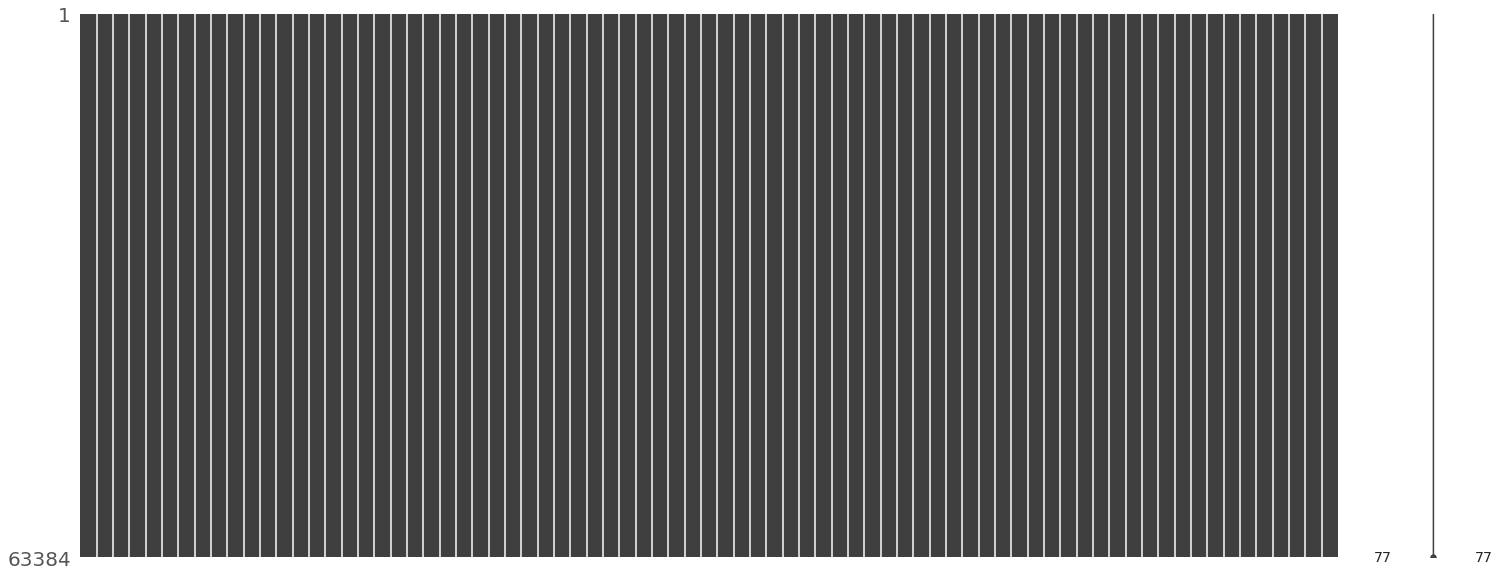

In [27]:
msno.matrix(df_cod)

Como se puede observar que ya no existen valores nulos en el conjunto de datos

Posteriormente analizar algunas variables que contengan valores outliers

In [28]:
from google.colab.data_table import DataTable
DataTable.max_columns = 72
df_cod.describe()

,SECUENCIAL,ID_ACCIDENTE,ANYO,MES,DIA_SEMANA,HORA,COD_PROVINCIA,COD_MUNICIPIO,ZONA,ZONA_AGRUPADA,...,CONDICION_NIVEL_CIRCULA,CONDICION_FIRME,CONDICION_ILUMINACION,CONDICION_METEO,VISIB_RESTRINGIDA_POR,ACERA,TRAZADO_PLANTA,Cod_CCAA,Codigo,Código Municipio
count,63384.000000,6.338400e+04,63384.0,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,...,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000,63384.000000
mean,36493.451455,2.020275e+14,2020.0,6.690947,3.828711,14.073899,23.682759,23768.551922,2.411918,1.711299,...,109.950145,1.480610,2.861842,2.252761,7.374416,901.973763,697.771646,8.323205,23.682759,23768.551922
std,21010.028895,2.413603e+10,0.0,3.623456,1.899911,5.302332,14.012778,14026.960155,0.906480,0.453162,...,308.489802,8.033517,30.445218,30.440907,31.480644,293.806792,457.051033,4.742833,14.012778,14026.960155
min,3.000000,2.020010e+14,2020.0,1.000000,1.000000,0.000000,1.000000,1002.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1002.000000
25%,17740.750000,2.020090e+14,2020.0,3.000000,2.000000,10.000000,8.000000,8191.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,998.000000,4.000000,4.000000,8.000000,8191.000000
50%,37574.500000,2.020281e+14,2020.0,7.000000,4.000000,14.000000,28.000000,28079.000000,3.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,998.000000,998.000000,9.000000,28.000000,28079.000000
75%,54253.250000,2.020350e+14,2020.0,10.000000,5.000000,18.000000,35.000000,35009.000000,3.000000,2.000000,...,6.000000,1.000000,3.000000,1.000000,18.000000,998.000000,998.000000,13.000000,35.000000,35009.000000
max,72959.000000,2.021520e+14,2020.0,12.000000,7.000000,23.000000,52.000000,52001.000000,4.000000,2.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,998.000000,19.000000,52.000000,52001.000000


Estos son las variables que tienen valores outliers:  ACERA, CONDICION_METEO, CONDICION_ILUMINACION, CONDICION_FIRME,CONDICION_NIVEL_CIRCULA, KM, VISIB_RESTRINGIDA_POR, TRAZADO_PLANTA

ELIMINACION: PRIORI_NORMA, PRIORI AGENTE, PRIORI_SEMAFORO, PRIORI_VERT_STOP, PRIORI_VERT_CEDA, DE TODAS LAS VARIANLES DE PRIORI

Eliminar las caracteristicas de algunas variables y eliminar instancia si tiene gran cantidad de valores anomalías 

In [29]:
priori = ['PRIORI_NORMA','PRIORI_AGENTE', 'PRIORI_SEMAFORO','PRIORI_VERT_STOP', 'PRIORI_VERT_CEDA', 'PRIORI_HORIZ_STOP', 'PRIORI_HORIZ_CEDA', 'PRIORI_MARCAS', 'PRIORI_PEA_NO_ELEV', 'PRIORI_PEA_ELEV', 
          'PRIORI_MARCA_CICLOS', 'PRIORI_CIRCUNSTANCIAL', 'PRIORI_OTRA']

In [30]:
df_cod.drop(priori, axis = 1, inplace = True)
print(df_cod.shape)

(63384, 64)


In [31]:
ind_missing = df_cod[df_cod['CONDICION_NIVEL_CIRCULA'] == 999.0].index 
df_cod = df_cod.drop(ind_missing, axis=0)
print(df_cod.shape)

(56573, 64)


In [32]:
ind_missing = df_cod[df_cod['CONDICION_FIRME'] == 999.0].index 
df_cod = df_cod.drop(ind_missing, axis=0)
print(df_cod.shape)

(56572, 64)


In [33]:
ind_missing = df_cod[df_cod['CONDICION_ILUMINACION'] == 999.0].index 
df_cod = df_cod.drop(ind_missing, axis=0)
print(df_cod.shape)

(56572, 64)


In [34]:
ind_missing = df_cod[df_cod['CONDICION_METEO'] == 999.0].index 
df_cod = df_cod.drop(ind_missing, axis=0)
print(df_cod.shape)

(56572, 64)


In [35]:
ind_missing = df_cod[df_cod['VISIB_RESTRINGIDA_POR'] == 999.0].index 
df_cod = df_cod.drop(ind_missing, axis=0)
print(df_cod.shape)

(56572, 64)


In [36]:
df_cod.groupby('ACERA').size()

ACERA
1        706
2          6
3        614
4       3649
998    49396
999     2201
dtype: int64

In [37]:
df_cod.drop('ACERA', axis = 1, inplace = True)
print(df_cod.shape)

(56572, 63)


In [38]:
df_cod.groupby('TRAZADO_PLANTA').size()

TRAZADO_PLANTA
1       9508
2       3375
3       1765
4       3951
998    37973
dtype: int64

In [39]:
df_cod.drop('TRAZADO_PLANTA', axis = 1, inplace = True)
print(df_cod.shape)

(56572, 62)


### ETAPA 4: MINERIA DE DATOS

# Distribución de Número total de cada variable:


*   TOTAL_MU24H: Especifica el número total de fallecidos registrados en el accidente, computados a 24 horas. Tipo numérico. 
*   TOTAL_HG24H: Especifica el número total de heridos hospitalizados registrados en el accidente, computados a 24 horas. Tipo numérico.
*   TOTAL_HL24H: Especifica el número total de heridos no hospitalizados registrados en el accidente, computados a 24 horas. Tipo numérico. 
*   TOTAL_HL24H: Especifica el número total de heridos no hospitalizados registrados en el accidente, computados a 24 horas. Tipo numérico. 
*   TOTAL_VICTIMAS_24H: Especifica el número total de víctimas (fallecidos+ heridos hospitalizados+ heridos. no hospitalizados) registrados en el accidente, computados a 24 horas. Tipo numérico. 





Text(0.5, 1.0, 'Distribución de número total de fallecidos registrados en el accidente, computados a 30 días')

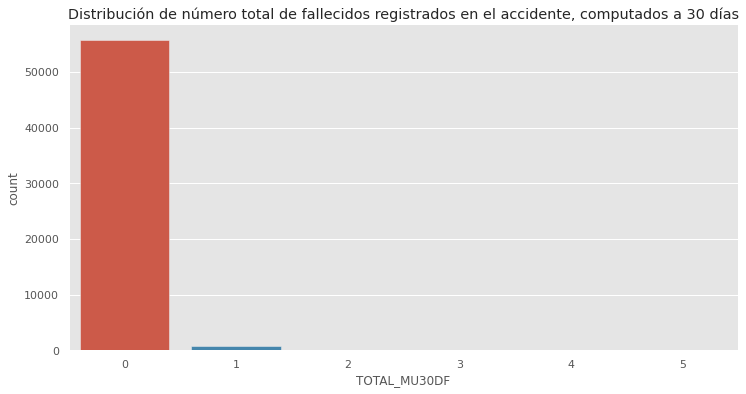

In [40]:
#Distribución 
plt.figure(figsize=(12,6))
sns.countplot(data = df_cod, x = "TOTAL_MU30DF")
df_cod['TOTAL_MU30DF'].value_counts(0).sort_index

plt.title('Distribución de número total de fallecidos registrados en el accidente, computados a 30 días')

Text(0.5, 1.0, 'Distribución de número total de fallecidos registrados en el accidente, computados a 24 horas')

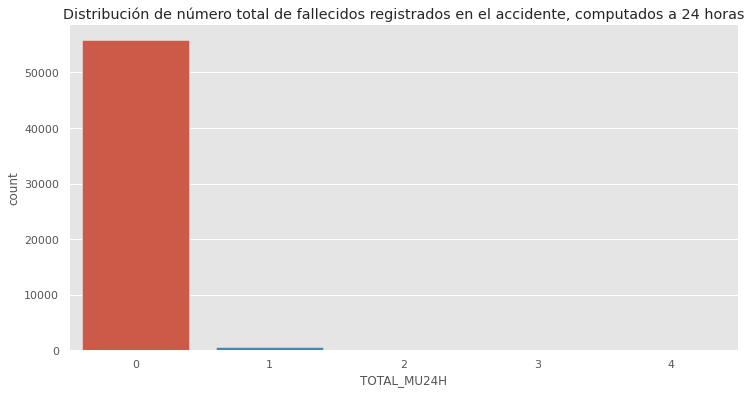

In [43]:
#Distribución 
plt.figure(figsize=(12,6))
sns.countplot(data = df_cod, x = "TOTAL_MU24H")
df_cod['TOTAL_MU24H'].value_counts(0).sort_index

plt.title('Distribución de número total de fallecidos registrados en el accidente, computados a 24 horas')

Text(0.5, 1.0, 'Distribución de número total de heridos hospitalizados registrados en el accidente, computados a 24 horas')

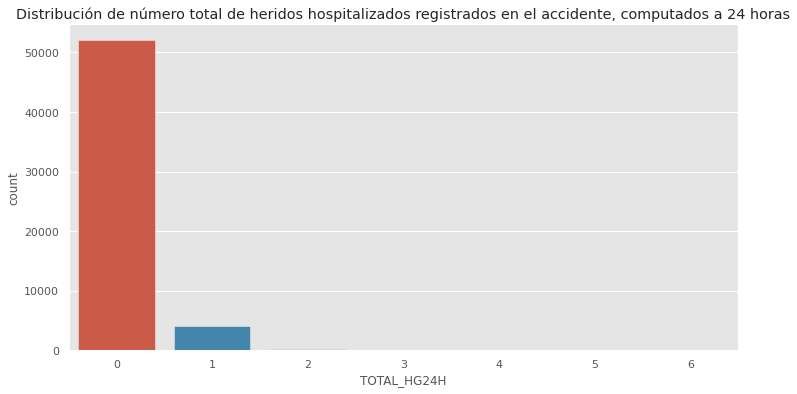

In [44]:
#Distribución 
plt.figure(figsize=(12,6))
sns.countplot(data = df_cod, x = 'TOTAL_HG24H')
df_cod['TOTAL_HG24H'].value_counts(0).sort_index

plt.title('Distribución de número total de heridos hospitalizados registrados en el accidente, computados a 24 horas')

Text(0.5, 1.0, 'Distribución de número total de heridos no hospitalizados registrados en el accidente, computados a 24 horas')

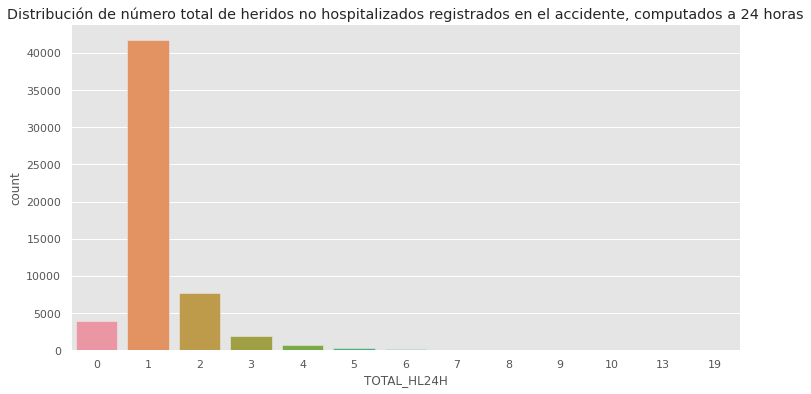

In [47]:
#Distribución 
plt.figure(figsize=(12,6))
sns.countplot(data = df_cod, x = 'TOTAL_HL24H')
df_cod['TOTAL_HL24H'].value_counts(0).sort_index

plt.title('Distribución de número total de heridos no hospitalizados registrados en el accidente, computados a 24 horas')

Text(0.5, 1.0, 'Distribución de el número total de víctimas ')

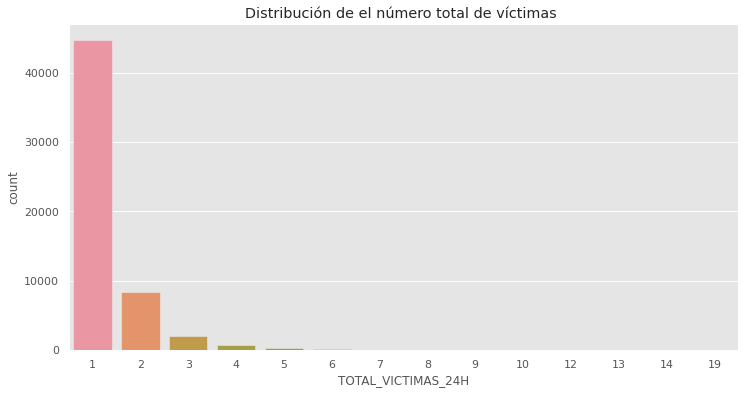

In [48]:
#Distribución 
plt.figure(figsize=(12,6))
sns.countplot(data = df_cod, x = 'TOTAL_VICTIMAS_24H')
df_cod['TOTAL_VICTIMAS_24H'].value_counts(0).sort_index

plt.title('Distribución de el número total de víctimas ')

Alguna distribucion presenta tendencia.

Text(0.5, 1.0, 'Distribución de vehiculos totales')

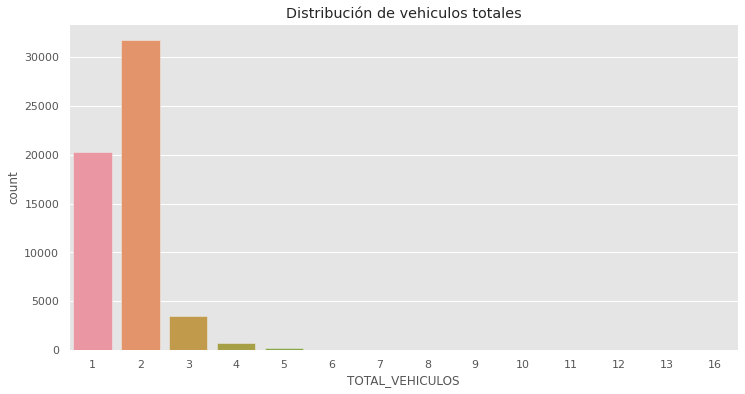

In [ ]:
#Distribución 
plt.figure(figsize=(12,6))
sns.countplot(data = df_cod, x = "TOTAL_VEHICULOS")
df_cod['TOTAL_VEHICULOS'].value_counts(0).sort_index

plt.title('Distribución de vehiculos totales')

TOTAL_VEHICULOS: Especifica el número total de vehículos implicados registrados en el accidente. Tipo numérico. 

En este caso presenta dos vehiculos involucrados que está en tendencia de acuerdo de la distribucción generada. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Comparación de Zona agrupada a titularidad de la via')

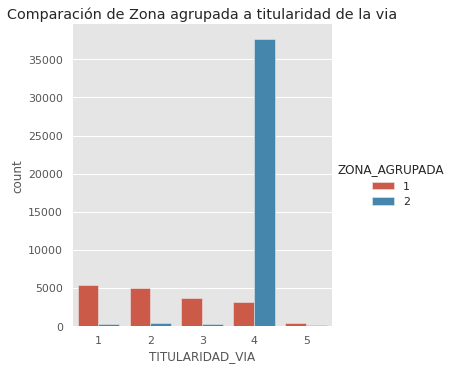

In [ ]:
sns.factorplot('TITULARIDAD_VIA',data=df_cod,hue='ZONA_AGRUPADA',kind="count")
df_cod[['ZONA_AGRUPADA', 'TITULARIDAD_VIA']].groupby(['ZONA_AGRUPADA'], as_index=False).agg(['count','sum','mean'])

plt.title('Comparación de Zona agrupada a titularidad de la via')


*   ZONA_AGRUPADA: Especifica el número de Zona en la que ocurrió el accidente. Tipo numérico. 
 (Agregación de la Zona en 2 valores: vías interurbanas y vías urbanas)
*   TITULARIDAD_VIA: Especifica el número de Administración titular de la vía en la que ocurrió el accidente. Tipo numérico. 
(Agregación de titularidad de vía en 5 Valores: Estatal, Autonómica, Provincial cabil-do/Consell, Otra y Municipal)

En la zona agrupada (Vias urbanas) hay una tendencia en municipal.





/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Comparación de Zona agrupada a sentido 1F')

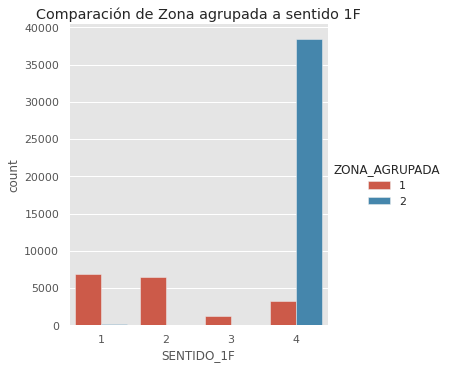

In [ ]:

sns.factorplot('SENTIDO_1F',data=df_cod,hue='ZONA_AGRUPADA',kind="count")
df_cod[['ZONA_AGRUPADA', 'SENTIDO_1F']].groupby(['ZONA_AGRUPADA'], as_index=False).agg(['count','sum','mean'])
plt.title('Comparación de Zona agrupada a sentido 1F')

*   ZONA_AGRUPADA: Especifica el número de Zona en la que ocurrió el accidente. Tipo numérico. 
 (Agregación de la Zona en 2 valores: vías interurbanas y vías urbanas)
*   SENTIDO_1F: Especifica el número de sentido de la vía donde ocurrió el accidente. Tipo numérico. 
(Agregación de Sentido 1F en 4 Valores: Ascendente, Descendente, Ambos, se desconoce)


TENDENCIA- En la zona agrupada (Vias urbanadas) que desconoce el sentido 1F




/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Histograma en Mes')

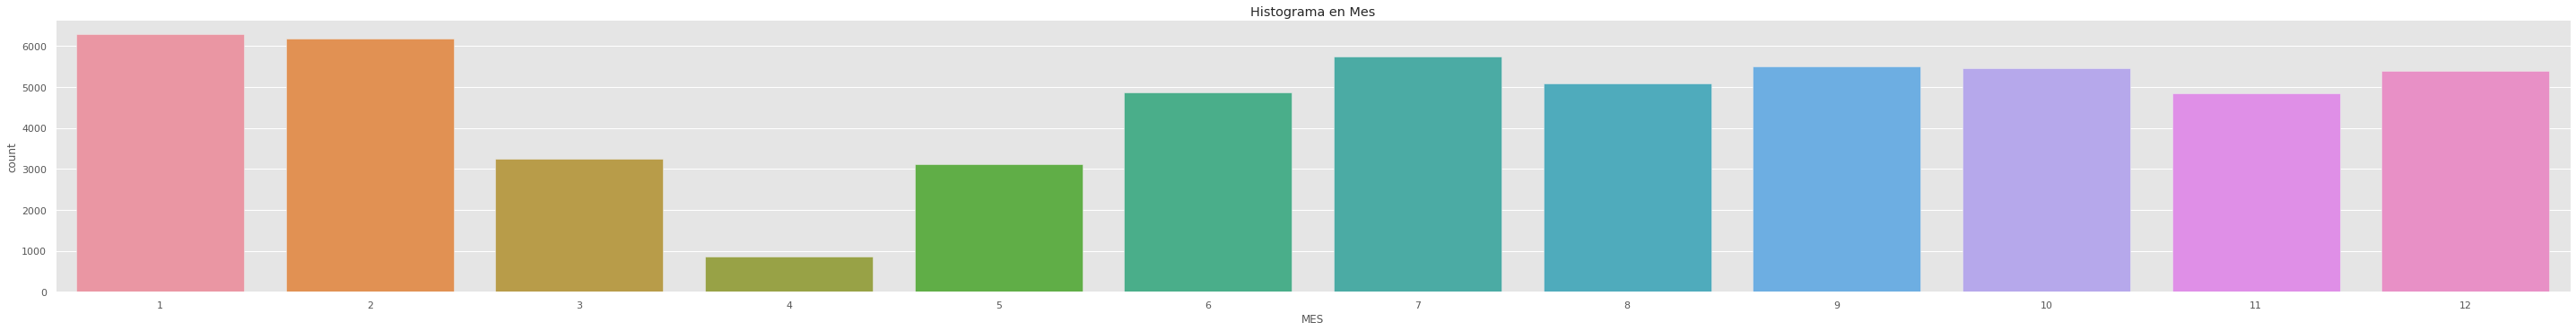

In [ ]:
sns.factorplot('MES',data=df_cod,kind="count", aspect=8)
plt.title('Histograma en Mes')

MES: Especifica el mes en el que ocurrió el accidente. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Histograma en Hora')

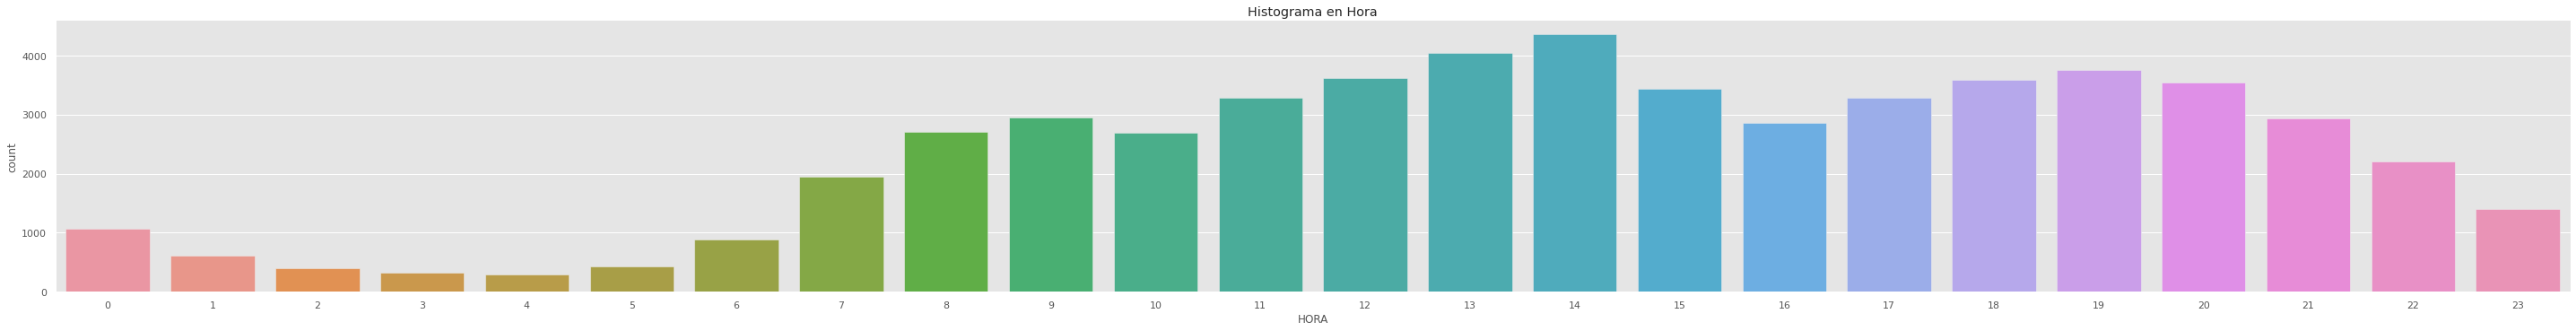

In [ ]:
sns.factorplot('HORA',data=df_cod,kind="count", aspect=8)
plt.title('Histograma en Hora')

HORA: Especifica la hora en la que ocurrió el accidente

Aproximadamente a las 2 pm ocurre mayor cantidad de accidente

### ETAPA 3: TRANSFORMACION





Esta etapa se realizará en Power BI.

In [ ]:
df_cod['ZONA_AGRUPADA'] = df_cod['ZONA_AGRUPADA'].map( {1: 'vías interurbanas', 
                                       2: 'vías urbanas',
                                        '':0} ).astype(str)

In [ ]:
df_cod['ZONA'] = df_cod['ZONA'].map( {1: 'carretera', 
                                       2: 'travesía',
                                      3: 'autopista',
                                      4: 'calle',
                                        '':0} ).astype(str)

In [ ]:
df_cod['SENTIDO_1F'] = df_cod['SENTIDO_1F'].map( {1: 'Ascendente', 
                                       2: 'Descendente',
                                      3: 'Ambos',
                                      4: 'Desconocido',
                                        '':0} ).astype(str)

In [ ]:

df_cod['TITULARIDAD_VIA'] = df_cod['TITULARIDAD_VIA'].map( {1: 'Estatal', 
                                       2: 'Autonómica',
                                      3: 'Provincial cabildo/Consell',
                                      4: 'Otra',
                                      5: 'Municipal',
                                        '':0} ).astype(str)

Descargar el conjunto de datos ya procesados para aplicar en otras herramientas

In [ ]:
#from google.colab import files

#with open('df.csv', 'w') as f:
 # df_cod.to_csv(f,  index = False)
  
#files.download('df.csv')

In [ ]:
df_cod.to_excel('df2.xlsx')

In [ ]:


df_cod['TOTAL_MU30DF'].sum()

850

In [ ]:
df_cod['TOTAL_VICTIMAS_30DF'].sum()

74151